# Problem Set 1
Due January 29th midnight

### Before You Start

Make sure to at least take a basic tutorial in the IPython notebook,
otherwise you'll be totally lost.  For this problem set, you should
download flights.csv.bz2 and weather.csv.bz2 datasets from
Canvas (files-data).   Rename the notebook to
LASTNAME_FIRSTNAME-PS1.ipynb.

When done, please submit
1. the notebook itself
2. the rendered html or pdf of it.

It is all fine to discuss the problems and way how to solve these with
your classmates and instructors.  However, the solutions must be your
own.  Don't copy-paste each other solutions!

## About the Problem Set: 

This problem set is rather similar to ones used for R, dplyr, and
flights data.  Just we use python and pandas.

Your task is to analyze the nycflights13 data (in the R package of the
                                               same name).  The
                                               necessary csv
files are provided on canvas (in files/data).  An easy way to get the
explanations is on the the [package page on R documentation](https://www.rdocumentation.org/packages/nycflights13/versions/1.0.0). 

In this problem set you will perform a basic exploratory analysis on
an example dataset, bringing to bear all of your new skills in data
manipulation and visualization. You will be required to submit well
commented python code, documenting all code used in this problem set,
along with a write up answering all questions below. Use figures as
appropriate to support your answers, and when required by the problem.

Always comment your results, preferably in a separate markdown cell.


## Preliminaries

You should also make sure the following libraries load correctly.
Below are a few basic data description tasks already done for you. 

In [18]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with arrays and matrices
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib.pyplot as plt  
from pylab import *
print( "Mapltolib version:    %6.6s (need at least 1.2.1)" %
       matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s (need at least 0.13.1)" %
       sklearn.__version__)
import os
# for certain system-related functions

IPython version:       6.2.1 (need at least 1.0)
Numpy version:        1.14.0 (need at least 1.7.1)
SciPy version:         1.0.0 (need at least 0.12.0)
Pandas version:       0.22.0 (need at least 0.11.0)
Mapltolib version:     2.1.2 (need at least 1.2.1)
Scikit-Learn version: 0.19.1 (need at least 0.13.1)


In [19]:
## Let's read the data and print some summary information
## adjust the path for your file system!
## you can find the path like this:
path = os.getcwd()
print(path)
flights_df= pd.read_csv('/Users/Admin/Downloads/flights.csv.bz2')



/Users/Admin/Downloads


In [20]:
## Extract some basic information about the data like number of rows,
## columns, column names, data types

print(flights_df.shape)
print(flights_df.columns)
print(flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [67]:
## print the first and last few lines of the data
print("head\n", flights_df.head())
print("tail\n", flights_df.tail())
## Find the number of unique destinations in the data ('dest')
print("destinations:\n", flights_df.dest.unique())


head
    Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  arr_delay  \
0           1  2013      1    1     517.0        2.0     830.0       11.0   
1           2  2013      1    1     533.0        4.0     850.0       20.0   
2           3  2013      1    1     542.0        2.0     923.0       33.0   
3           4  2013      1    1     544.0       -1.0    1004.0      -18.0   
4           5  2013      1    1     554.0       -6.0     812.0      -25.0   

  carrier tailnum  flight origin dest  air_time  distance  hour  minute  
0      UA  N14228    1545    EWR  IAH     227.0      1400   5.0    17.0  
1      UA  N24211    1714    LGA  IAH     227.0      1416   5.0    33.0  
2      AA  N619AA    1141    JFK  MIA     160.0      1089   5.0    42.0  
3      B6  N804JB     725    JFK  BQN     183.0      1576   5.0    44.0  
4      DL  N668DN     461    LGA  ATL     116.0       762   5.0    54.0  
tail
         Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  \
336771    

## Some Tips

* This assignment involves extensive Data frame splitting and
  aggregation. You should look into the details of the methods
  groupby, transform, sum, count, mean etc 
* Many of the tasks in the assignment can be done either through the
  Pandas Data Frame or by converting the data frames to Series. Many
  of the methods in the numpy are applicable to Series only. When
  stuck, try to explore the type of object (Pandas Data Frame or Numpy
  Series) you are dealing with. 

## Question 1

Let’s explore flights from NYC to LA. Use the flights dataset to answer the following questions.

### (a)

How many flights were there from NYC airports to Los Angeles International Airport (LAX) in 2013?

In [21]:
# Your code here
flights_df

flights_nyc=flights_df[flights_df['dest']=="LAX"]
print(flights_nyc.shape)
print(flights_nyc.head())
#print(flights_nyc.head())

(16174, 17)
    Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  arr_delay  \
12          13  2013      1    1     558.0       -2.0     924.0        7.0   
37          38  2013      1    1     628.0       -2.0    1016.0       29.0   
63          64  2013      1    1     658.0       -2.0    1027.0        2.0   
69          70  2013      1    1     702.0        2.0    1058.0       44.0   
91          92  2013      1    1     743.0       13.0    1107.0        7.0   

   carrier tailnum  flight origin dest  air_time  distance  hour  minute  
12      UA  N29129     194    JFK  LAX     345.0      2475   5.0    58.0  
37      UA  N33289    1665    EWR  LAX     366.0      2454   6.0    28.0  
63      VX  N627VA     399    JFK  LAX     361.0      2475   6.0    58.0  
69      B6  N779JB     671    JFK  LAX     381.0      2475   7.0     2.0  
91      AA  N338AA      33    JFK  LAX     358.0      2475   7.0    43.0  


### (b)

Which airline ('carrier') has the most flights from NYC to LAX? Which one has the least number of flights? Report the numbers respectively. 

In [22]:
# Your code here
# Check number of flights for each airline
print(flights_nyc.carrier.unique())
print(flights_nyc[flights_nyc['carrier']=="UA"].shape)
print(flights_nyc[flights_nyc['carrier']=="VX"].shape)
print(flights_nyc[flights_nyc['carrier']=="B6"].shape)
print(flights_nyc[flights_nyc['carrier']=="AA"].shape)
print(flights_nyc[flights_nyc['carrier']=="DL"].shape)

['UA' 'VX' 'B6' 'AA' 'DL']
(5823, 17)
(2580, 17)
(1688, 17)
(3582, 17)
(2501, 17)


### (c)

How many unique air planes fly from NYC to LAX?
(Hint: use 'tailnum', essentially the license plate of airplane)

In [23]:
# Your code here
print(flights_nyc.tailnum.unique().shape)




(992,)


### (d)

What is the average arrival delay for flights from NYC to LAX?

In [24]:
# Your code here
flights_nyc.columns
flights_nyc['arr_delay'].mean()

0.5471109447148383

### (e)

What proportion of flights to LAX come from each NYC airport?

In [25]:
# Your code here
#flights_nyc_jfk=flights_nyc[flights_nyc['origin']=="JFK"]
#JFK_val=flights_nyc_jfk['origin'].value_counts()
count_nonzero(flights_nyc)



273096

## Question 2

Now let's explore the entire NYC flight dataset. Flights are often delayed. Consider the following questions exploring delay patterns.

### (a)

Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [26]:
# Your code here

#computing largest average deaprture delay and arrival delay
import pandas as pd
flights_df.head()
flights_df.tail()
flights_df.columns
flights_df['date']=flights_df['year'].astype(str)+"-"+flights_df['month'].astype(str)+"-"+flights_df['day'].astype(str)

avg=pd.DataFrame(flights_df.groupby('date').mean())
#print(avg)

print(avg.sort_values(['dep_delay'], ascending =False).head(1))
print("----")
print(avg.sort_values(['arr_delay'],ascending=False).head(1))
#flights_df.describe()

          Unnamed: 0    year  month  day     dep_time  dep_delay     arr_time  \
date                                                                            
2013-3-8    143267.0  2013.0    3.0  8.0  1416.659574  83.536921  1503.931078   

          arr_delay       flight    air_time     distance       hour  \
date                                                                   
2013-3-8  85.862155  2013.537283  153.746867  1002.540347  13.867334   

             minute  
date                 
2013-3-8  29.926158  
----
          Unnamed: 0    year  month  day     dep_time  dep_delay     arr_time  \
date                                                                            
2013-3-8    143267.0  2013.0    3.0  8.0  1416.659574  83.536921  1503.931078   

          arr_delay       flight    air_time     distance       hour  \
date                                                                   
2013-3-8  85.862155  2013.537283  153.746867  1002.540347  13.867334   

       

### (b)

What was the worst day and the best day to fly out of NYC in 2013
if you dislike delayed flights?

Note: we ask the largest delay given there was a (positive) delay, we
don't care about flights that were in time or early.

In [27]:
# Your code her


print("The worst day to fly out of NYC was" )

worst_day=avg.sort_values(['dep_delay'], ascending=False)['dep_delay'].head(1)
print(worst_day)

print("The best day to fly out of NYC was")

best_day=avg.sort_values(['dep_delay'], ascending=True)['dep_delay'].head(1)
print(best_day)

The worst day to fly out of NYC was
date
2013-3-8    83.536921
Name: dep_delay, dtype: float64
The best day to fly out of NYC was
date
2013-9-24   -1.329832
Name: dep_delay, dtype: float64


### (c)

On average which airline has the lowest departure delay for
   their NYC flights in 2013 in this dataset? and which one has the
   greatest departure delay?

Note: here we want to include both positive and negative delays (early departures)   

In [28]:
# Your code here
flights_df.columns

avg_carrier=pd.DataFrame(flights_df.groupby('carrier').mean())
avg_low=avg_carrier.sort_values(['dep_delay'], ascending=True)['dep_delay'].head(1)
#lowest departure
print(avg_low)

#highest departure
avg_high=avg_carrier.sort_values(['dep_delay'], ascending=False)['dep_delay'].head(1)
print(avg_high)

carrier
US    3.782418
Name: dep_delay, dtype: float64
carrier
F9    20.215543
Name: dep_delay, dtype: float64


### (d)

Are there any seasonal patterns in departure delays for flights from NYC?

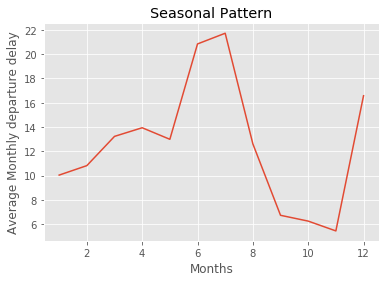

[]

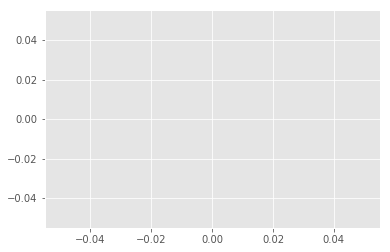

In [29]:
# Your code here

matplotlib.style.use("ggplot")
plt.plot(flights_df.groupby("month")['dep_delay'].mean())
plt.xlabel("Months", size=12)
plt.ylabel("Average Monthly departure delay")
plt.title("Seasonal Pattern")
plt.show()

plt.plot()

### (e)

On average, how do departure delays vary over the course of a day?

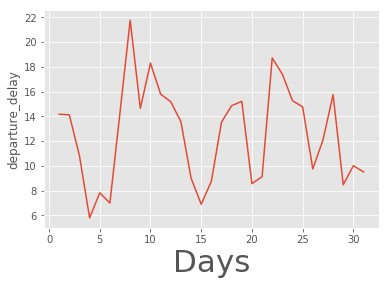

In [30]:
# Your code here
flights_df.columns
avg_byday=flights_df.groupby('day').mean()

matplotlib.style.use('ggplot')
plt.plot(flights_df.groupby('day')['dep_delay'].mean())
plt.xlabel("Days", size=31)
plt.ylabel("departure_delay")
plt.show()

## Question 3

Which flight departing NYC in 2013 flew the fastest?

Note: compute the speed as distance/time.

In [31]:
# Your code here
flights_df.head()
flights_df.columns
flights_df["speed"]=flights_df.distance/(flights_df.air_time/60)
x=['year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute', 'date', 'speed']
fastest_flight=flights_df.sort_values(['speed'], ascending=False)[x].head(1)
print(fastest_flight)

        year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier  \
216447  2013      5   25    1709.0        9.0    1923.0      -14.0      DL   

       tailnum  flight origin dest  air_time  distance  hour  minute  \
216447  N666DN    1499    LGA  ATL      65.0       762  17.0     9.0   

             date       speed  
216447  2013-5-25  703.384615  


## Question 4

Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [34]:
# Your code here
flights_df.head()
flights_df['flight_detail']=flights_df['carrier'].astype(str)+'-'+ flights_df['flight'].astype(str)+'-'+flights_df['dest'].astype(str)

flights_df.head()

date_count=pd.DataFrame(flights_df['date'].unique())


date_count.rename(columns={0:'dates'}, inplace =True)
date_count.head()
flights_group=flights_df.groupby(['flight_detail', 'date']).count()
flights_group.reset_index(level=0, inplace=True)
flights_group.reset_index(level=0, inplace=True)

flights_group.rename(columns={'Unnamed: 0':'count'}, inplace=True)

flights_group=flights_group.groupby('flight_detail').count().sort_values('count', ascending=False)


flights_group.reset_index(level=0, inplace=True)
flights_group=flights_group[flights_group['count']==365]['flight_detail']
#flights_group.columns.unique
flight_list=[]
for eachflight in flights_group:
    flight_list.append(eachflight)
flight_list    



['UA-15-HNL',
 'B6-371-FLL',
 'AA-181-LAX',
 'B6-219-CLT',
 'AA-119-LAX',
 'B6-703-SJU',
 'DL-2391-TPA',
 'AA-1357-SJU',
 'EV-5712-IAD',
 'VX-251-LAS',
 'AA-1611-MIA',
 'VX-413-LAX',
 'DL-2159-MCO',
 'B6-431-SRQ',
 'VX-407-LAX',
 'AA-59-SFO',
 'B6-1783-MCO',
 'B6-359-BUR']

## Question 5

Develop one research question you can address using the nycflights2013
dataset. Provide two visualizations to support your exploration of
this question. Discuss what you find. 

Note: we'll using matplotlib for plotting in this course, but you can use something else too.

In [ ]:
# Your code here
The research question being studied is:
Is the arrival delay time affected by travel time in the air and the distance travelled by the flight?

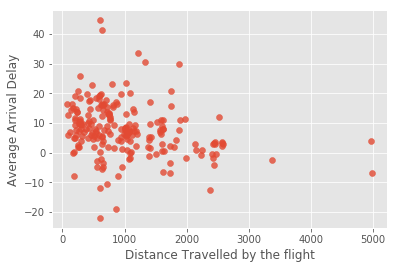

In [53]:
import statsmodels.api as sm
%matplotlib inline

distance_delay = flights_df.groupby('distance', as_index = False)['arr_delay'].mean()

x_axis = distance_delay.distance
y_axis = distance_delay.arr_delay
plt.xlabel("Distance Travelled by the flight")
plt.ylabel("Average Arrival Delay")
plt.scatter(x, y, alpha=0.8)

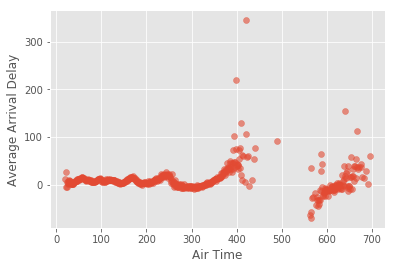

In [55]:
distance_delay = flights_df.groupby('air_time', as_index = False)['arr_delay'].mean()

x_axis = distance_delay.air_time
y_axis = distance_delay.arr_delay
plt.xlabel("Air Time")
plt.ylabel("Average Arrival Delay")
plt.scatter(x, y, alpha=0.6)

## Question 6

What weather conditions are associated with flight delays leaving NYC?  Use graphics to explore.

Note: you need to use 'weather.csv' dataset

In [46]:
# Your code here
weather_df=pd.read_csv("weather.csv.bz2")


weather_conditions = pd.merge(flights_df[['year','month','day','dep_delay','hour']], weather_df[['temp','dewp','humid','wind_dir','wind_speed','wind_gust','precip','visib']],  how='left', left_on=[flights_df.origin,flights_df.month, flights_df.day,flights_df.hour], right_on=[weather_df.origin,weather_df.month, weather_df.day,weather_df.hour])
print(weather_conditions)

        year  month  day  dep_delay  hour   temp   dewp  humid  wind_dir  \
0       2013      1    1        2.0   5.0    NaN    NaN    NaN       NaN   
1       2013      1    1        4.0   5.0    NaN    NaN    NaN       NaN   
2       2013      1    1        2.0   5.0    NaN    NaN    NaN       NaN   
3       2013      1    1       -1.0   5.0    NaN    NaN    NaN       NaN   
4       2013      1    1       -6.0   5.0    NaN    NaN    NaN       NaN   
5       2013      1    1       -4.0   5.0    NaN    NaN    NaN       NaN   
6       2013      1    1       -5.0   5.0    NaN    NaN    NaN       NaN   
7       2013      1    1       -3.0   5.0    NaN    NaN    NaN       NaN   
8       2013      1    1       -3.0   5.0    NaN    NaN    NaN       NaN   
9       2013      1    1       -2.0   5.0    NaN    NaN    NaN       NaN   
10      2013      1    1       -2.0   5.0    NaN    NaN    NaN       NaN   
11      2013      1    1       -2.0   5.0    NaN    NaN    NaN       NaN   
12      2013

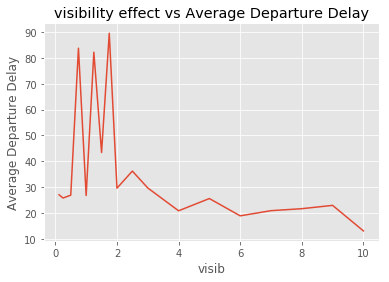

In [47]:
visib_effect = weather_conditions.groupby(['visib'])['dep_delay'].mean()
plt.plot(visib_effect)
plt.xlabel("visib")
plt.ylabel("Average Departure Delay")
plt.title('visibility effect vs Average Departure Delay')
plt.show()


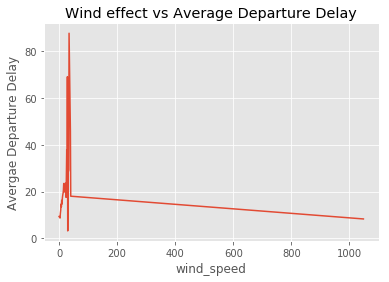

In [49]:
wind_effect=weather_conditions.groupby(['wind_speed'])['dep_delay'].mean()
plt.plot(wind_effect)
plt.xlabel("wind_speed")
plt.ylabel("Avergae Departure Delay")
plt.title("Wind effect vs Average Departure Delay")
plt.show()

In [ ]:
As visibility inceases average departure delay decreases. As Wind speed increases, the departure delay decreases.